### Titanic EDA
2022/10/03

Wurdruw Zurovast
Credit to someone else's Titanic work

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("2022-09-24-titanic-dataset-1-.csv")

Text(0.5, 1.0, 'Age breakdown')

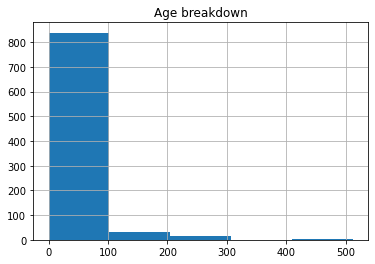

In [21]:
df.Fare.hist(bins=5)
plt.title("Age breakdown")

In [9]:
df[df.Sex].value_counts().plot(kind="bar")

KeyError: "None of [Index(['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male',\n       'female', 'female',\n       ...\n       'male', 'female', 'male', 'male', 'female', 'male', 'female', 'female',\n       'male', 'male'],\n      dtype='object', length=891)] are in the [columns]"

Text(0.5, 1.0, 'Gender of passengers')

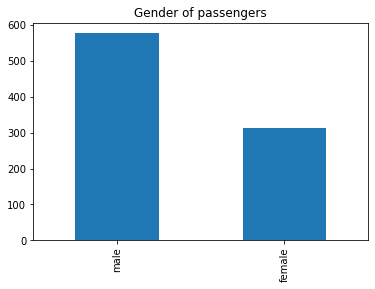

In [22]:
# Without mentioning the frame of df, it works.
df.Sex.value_counts().plot(kind="bar")
plt.title("Gender of passengers")

IndexError: index 0 is out of bounds for axis 0 with size 0

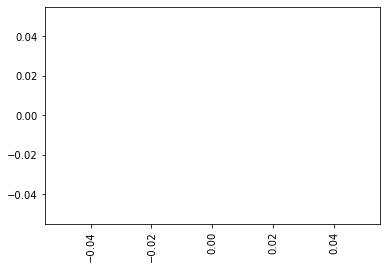

In [11]:
# As much as I thought binary was used for sex, it wasn't.
df[df.Sex == 0].Survived.value_counts().plot(kind="bar")

<AxesSubplot:title={'center':'Male survivorship'}>

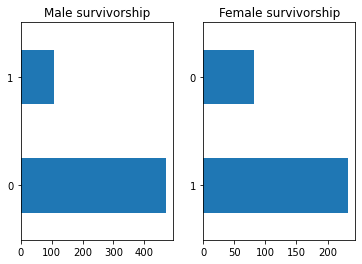

In [23]:
fig, axis = plt.subplots(1,2)
df[df.Sex == "female"].Survived.value_counts().plot(kind="barh", ax=axis[1], title="Female survivorship")
df[df.Sex == "male"].Survived.value_counts().plot(kind="barh", ax=axis[0], title = "Male survivorship")

In [ ]:
# How do I reference column values again?
df[df]

In [ ]:
df[df.Age =< 14]

In [ ]:
df[df.Age <= 14].value_counts().Survived.plot(kind="bar")

In [24]:
df[df.Age <= 14].count()

PassengerId    77
Survived       77
Pclass         77
Name           77
Sex            77
Age            77
SibSp          77
Parch          77
Ticket         77
Fare           77
Cabin          12
Embarked       77
dtype: int64

In [ ]:
df[df.Age].plot.hist()

In [26]:
# The grandparent age would have been around 39 years old from marrying age of 
# 16 twice back in the past's average lifespan.
# df.Age.hist()

Text(0.5, 1.0, 'Child survivorship')

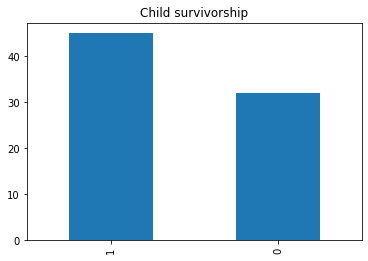

In [27]:
# Tried putting value counts on later.
# Out of 73 children, 30 died.
df[df.Age <= 14].Survived.value_counts().plot(kind="bar")
plt.title("Child survivorship")

In [13]:
df[df.Age <= 14]&[df.Sex == "female"].Survived.value_counts().plot(kind="bar")

AttributeError: 'list' object has no attribute 'Survived'

Text(0.5, 1.0, 'Child survivorship of girls')

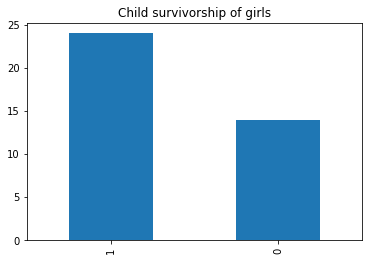

In [28]:
# Formatting conditions into parentheses.
df[(df.Age <= 14) & (df.Sex == "female")].Survived.value_counts().plot(kind="bar")
plt.title("Child survivorship of girls")

In [15]:
# Side by side does not work.
fig, axis = plt.subplots(1,2)
df[df.Age <= 14].Survived.value_counts().plot(kind="bar", ax=axis[0], title="Average child survivorship")
df[(df.Age <= 14) & (df.Sex == "female")].Survived.value_counts().plot(kind="bar", ax=axis[1], "Female child survivorship")

SyntaxError: positional argument follows keyword argument (2701726032.py, line 4)

Text(0.5, 1.0, 'Elderly women survivorship')

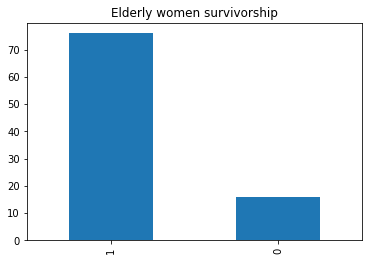

In [32]:
# Female elderly
df[(df.Age > 32) & (df.Sex == "female")].Survived.value_counts().plot(kind="bar")
plt.title("Elderly women survivorship")

Text(0.5, 1.0, 'Elderly men survivorship')

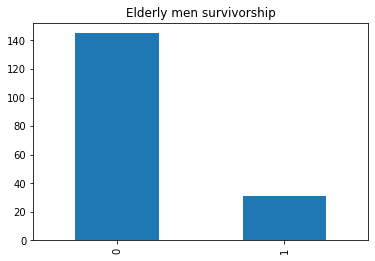

In [33]:
# Since that worked, male elderly
df[(df.Age > 32) & (df.Sex == "male")].Survived.value_counts().plot(kind="bar")
plt.title("Elderly men survivorship")
# Old women survived without their men.

In [34]:
# Only 4 crew in the dataset. 
# The were men 19-49 years old set in 3rd class who embarked at Southampton.

# I guess most of the crew was English and this posed a language barrier with 
# 3rd class immigrating passengers. 
# As there was not much time to evacuate and staff had earlier denied an 
# emergency, people speaking other languages supposed to be sleeping under 
# a few decks might have struggled to get organized.
df[df.Ticket == "LINE"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


In [35]:
df[df.Ticket == "LINE"].count()

PassengerId    4
Survived       4
Pclass         4
Name           4
Sex            4
Age            4
SibSp          4
Parch          4
Ticket         4
Fare           4
Cabin          0
Embarked       4
dtype: int64

In [36]:
df[df.Ticket == "LINE"].value_counts()

Series([], dtype: int64)

In [41]:
df[df.Ticket == "LINE"].Survived.value_counts()

0    3
1    1
Name: Survived, dtype: int64

In [38]:
df[df.Sex].Pclass.value_counts().plot(kind="bar")

KeyError: "None of [Index(['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male',\n       'female', 'female',\n       ...\n       'male', 'female', 'male', 'male', 'female', 'male', 'female', 'female',\n       'male', 'male'],\n      dtype='object', length=891)] are in the [columns]"

Text(0.5, 1.0, 'Economic status of female passengers from ticket class')

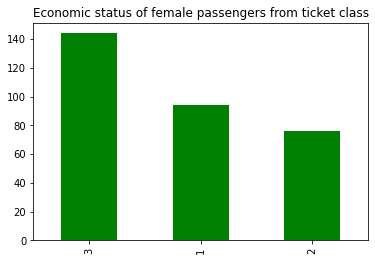

In [49]:
df[df.Sex == "female"].Pclass.value_counts().plot(kind="bar", color="g")
plt.title("Economic status of female passengers from ticket class")

Text(0.5, 1.0, 'Economic status of female passengers from ticket class')

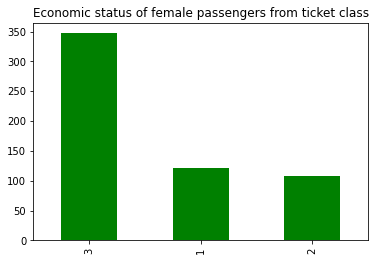

In [48]:
df[df.Sex == "male"].Pclass.value_counts().plot(kind="bar", color="g")
plt.title("Economic status of female passengers from ticket class")

Text(0.5, 1.0, 'Economic status of elderly women from ticket class')

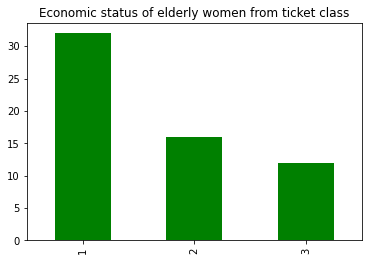

In [47]:
df[(df.Age >= 39) & (df.Sex == "female")].Pclass.value_counts().plot(kind="bar", color="g")
plt.title("Economic status of elderly women from ticket class")

Text(0.5, 1.0, 'Economic status of elderly men from ticket class')

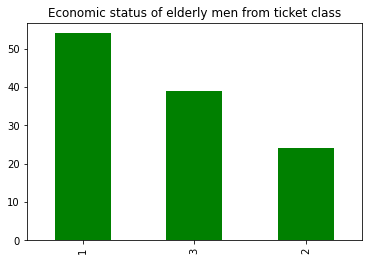

In [46]:
# There were a lot of older men traveling 3rd class who were not crew.
df[(df.Age >= 39) & (df.Sex == "male")].Pclass.value_counts().plot(kind="bar", color="g")
plt.title("Economic status of elderly men from ticket class")